In [67]:
import kornia
import matplotlib.pyplot as plt
import torch
import cv2
import torchvision
import numpy as np


In [68]:
def MyCanny(x_gray, kernal_size, sigma, tau):
    #blur the image

    x_blur: torch.Tensor = kornia.filters.gaussian_blur2d(x_gray, kernal_size, sigma)
    img_array = kornia.tensor_to_image(x_blur)

    x = [[1.0,0.0,-1.0], [2.0,0.0,-2.0], [1.0,0.0,-1.0]]
    sobel_x = torch.tensor(x)
    y = [[1.0,2.0,1.0], [0.0,0.0,0.0], [-1.0,-2.0,-1.0]]
    sobel_y = torch.tensor(y)
    magnitude = np.zeros_like(x_blur)
    degrees = np.zeros_like(x_blur)
    thin_edges = np.zeros_like(x_blur)
    
    h = x_blur.size(dim=2)
    w = x_blur.size(dim=3)
    
    for i in range(h-3):
        for j in range(w-3):
            gx = torch.sum(torch.multiply(sobel_x, x_blur[:,:,i:i + 3, j:j + 3]))  # x direction
            gy = torch.sum(torch.multiply(sobel_y, x_blur[:,:,i:i + 3, j:j + 3]))  # y direction
            gx2 = torch.pow(gx,2)
            gy2 = torch.pow(gy,2)
            
            magnitude[:,:,i , j ] = torch.sqrt(gx2+gy2)  
            degrees[:,:,i , j ]= torch.rad2deg(torch.atan(gy/gx))
    
        h = x_blur.size(dim=2)
        w = x_blur.size(dim=3)
    
    for i in range(h- 1):
        for j in range(w - 1):
            if((degrees[:,:,i,j] >= -22.5 and degrees[:,:,i,j] <= 22.5) or (degrees[:,:,i,j] <= -157.5 and degrees[:,:,i,j] >= 157.5)):
                if((magnitude[:,:,i,j] > magnitude[:,:,i,j+1]) and (magnitude[:,:,i,j] > magnitude[:,:,i,j-1])):
                    thin_edges[:,:,i,j] = magnitude[:,:,i,j]
                else:
                    thin_edges[:,:,i,j] = 0.0
            if((degrees[:,:,i,j] >= 22.5 and degrees[:,:,i,j] <= 67.5) or (degrees[:,:,i,j] <= -112.5 and degrees[:,:,i,j] >= -157.5)):
                if((magnitude[:,:,i,j] > magnitude[:,:,i+1,j+1]) and (magnitude[:,:,i,j] > magnitude[:,:,i-1,j-1])):
                    thin_edges[:,:,i,j] = magnitude[:,:,i,j]
                else:
                    thin_edges[:,:,i,j] = 0.0
            if((degrees[:,:,i,j] >= 67.5 and degrees[:,:,i,j] <= 112.5) or (degrees[:,:,i,j] <= -67.5 and degrees[:,:,i,j] >= -112.5)):
                if((magnitude[:,:,i,j] > magnitude[:,:,i+1,j]) and (magnitude[:,:,i,j] > magnitude[:,:,i-1,j])):
                    thin_edges[:,:,i,j] = magnitude[:,:,i,j]
                else:
                    thin_edges[:,:,i,j] = 0.0
            if((degrees[:,:,i,j] >= 112.5 and degrees[:,:,i,j] <= 157.5) or (degrees[:,:,i,j] <= -22.5 and degrees[:,:,i,j] >= -67.5)):
                if((magnitude[:,:,i,j] > magnitude[:,:,i+1,j-1]) and (magnitude[:,:,i,j] > magnitude[:,:,i-1,j+1])):
                    thin_edges[:,:,i,j] = magnitude[:,:,i,j]
                else:
                    thin_edges[:,:,i,j] = 0.0
    
    return thin_edges


In [69]:
x_rgb: torch.Tensor = kornia.io.load_image("dog.png", kornia.io.ImageLoadType.RGB32)[None, ...]  
# BxCxHxW Batch Channel Height Width
x_gray = kornia.color.rgb_to_grayscale(x_rgb)

#call the function here
part1 =  MyCanny(x_gray,(3,3), (0.09,0.09), 0)

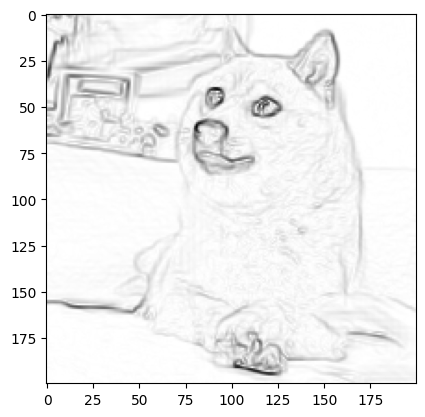

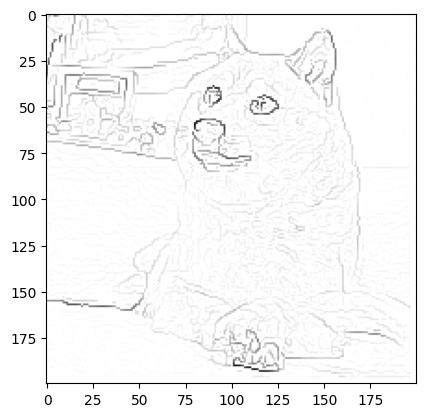

In [70]:
tx = torch.from_numpy(part1)
img_arrayx = kornia.tensor_to_image(tx)

###############################################################
#compare to in-built

x_sobel: torch.Tensor = kornia.filters.sobel(x_gray)
sob = kornia.tensor_to_image(x_sobel)

#################################################################
#original in-built
plt.imshow(1.0-sob, cmap='gray')
plt.show()

#my implementation
plt.imshow(1.0-img_arrayx, cmap="gray")
plt.show()

In [83]:
x_rgb: torch.Tensor = kornia.io.load_image("bowl-of-fruit.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]  
# BxCxHxW Batch Channel Height Width
x_gray = kornia.color.rgb_to_grayscale(x_rgb)

#call the function here
part1 =  MyCanny(x_gray,(19,19), (19,19), 0)

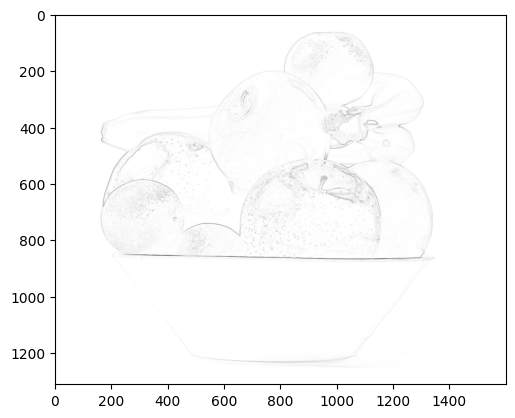

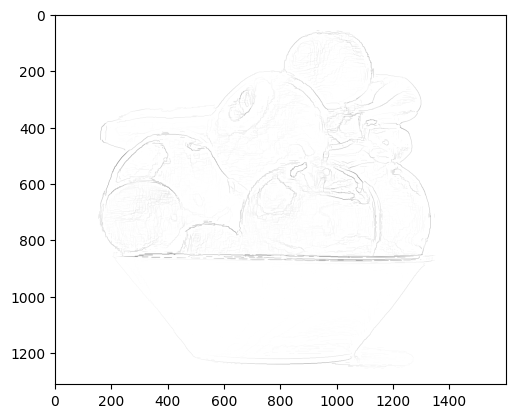

In [84]:
tx = torch.from_numpy(part1)
img_arrayx = kornia.tensor_to_image(tx)

###############################################################
#compare to in-built

x_sobel: torch.Tensor = kornia.filters.sobel(x_gray)
sob = kornia.tensor_to_image(x_sobel)

#################################################################
#original in-built
plt.imshow(1.0-sob, cmap='gray')
plt.show()

#my implementation
plt.imshow(1.0-img_arrayx, cmap="gray")
plt.show()